<a href="https://colab.research.google.com/github/vdvran/ICU/blob/master/ICU_Mortality_Prediction_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ICU Mortality Prediction Classification


In [0]:
# Import libraries
import numpy as np
import matplotlib
import scipy.stats as ss
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [0]:
data = pd.read_csv("/content/drive/My Drive/pre_ICU_Mortality_Prediction.csv")

In [0]:
data=data.drop(['Unnamed: 0'], axis=1)
data.head()

,hospital_death,age,bmi,elective_surgery,height,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,...,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,0.0,68.0,22.730000,0.0,180.3,0.541667,0.0,73.9,113.0,502.01,...,1,0,0,0,0,0,0,0,0,0
1,0.0,77.0,27.420000,0.0,160.0,0.927778,0.0,70.2,108.0,203.01,...,0,0,0,0,0,0,1,0,0,0
2,0.0,25.0,31.950000,0.0,172.7,0.000694,0.0,95.3,122.0,703.03,...,0,0,0,1,0,0,0,0,0,0
3,0.0,81.0,22.640000,1.0,165.1,0.000694,0.0,61.7,203.0,1206.03,...,1,0,0,0,0,0,0,0,0,0
4,0.0,19.0,27.654655,0.0,188.0,0.073611,0.0,80.3,119.0,601.01,...,0,0,0,0,0,0,0,1,0,0


# Content

**1. General info**

    a) df visualisation (ICU Mortality Prediction Visualization Notebook)
  
    b)  drop variables with a lot of missing values (ICU Mortality Prediction Preprocessing Notebook)
  
  
**2. Remove outliers** (ICU Mortality Prediction Preprocessing Notebook)


**3. Replace missing values** (ICU Mortality Prediction Preprocessing Notebook)


**4. One Hot Encoding** (ICU Mortality Prediction Preprocessing Notebook)


**5. Normalisation** (ICU Mortality Prediction Classification Notebook)

    a) x, y and train_test_split 

    b) Standarisation 

**6. Feature Selection** (ICU Mortality Prediction Classification Notebook)

    a) Feature importance

    b) Algoritmo univariante --> Prueba F de Fisher

    c) Eliminación Recursiva de atributos --> 
 
 **7. Umbalanced** (ICU Mortality Prediction Classification Notebook)
 
 **8. Classification** (ICU Mortality Prediction Classification Notebook)
 
    a) LDA (Fisher)
 
    b) Mayoría de votos
 
    c) Boosted trees
   
    d) Random forest


---------


# Normalisation

## Train and Test

In [0]:
y = data['hospital_death']
x = data.loc[:, data.columns != 'hospital_death']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [0]:
names = x_train.columns

scaler = preprocessing.StandardScaler()

x_train = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train, columns=names)

-------

# Feature selection

## Feature importance

In [0]:
threshold = 0.9
# Absolute value correlation matrix
corr_matrix = x.corr().abs()
corr_matrix.head()

,age,bmi,elective_surgery,height,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,...,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
age,1.000000,0.086472,0.064523,0.109526,0.049163,NaN,0.126515,0.020766,0.056479,0.056585,...,0.155293,0.050252,0.005158,0.286280,0.008042,0.030091,0.024166,0.083385,0.028262,0.027576
bmi,0.086472,1.000000,0.015975,0.052753,0.000160,NaN,0.873599,0.024247,0.006238,0.015509,...,0.038734,0.022638,0.007969,0.048204,0.025929,0.039787,0.018304,0.048079,0.017027,0.031674
elective_surgery,0.064523,0.015975,1.000000,0.023238,0.131843,NaN,0.026468,0.356357,0.775327,0.908247,...,0.066016,0.099491,0.036999,0.133043,0.034251,0.043393,0.069350,0.034419,0.028278,0.398976
height,0.109526,0.052753,0.023238,1.000000,0.008589,NaN,0.386629,0.001860,0.014964,0.024890,...,0.001075,0.010554,0.010751,0.014140,0.013265,0.027789,0.025513,0.041862,0.004965,0.041981
pre_icu_los_days,0.049163,0.000160,0.131843,0.008589,1.000000,NaN,0.003593,0.077699,0.087556,0.125819,...,0.003831,0.035804,0.002740,0.067671,0.040215,0.005358,0.045748,0.045316,0.007551,0.084121


In [0]:
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()
# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print('There are %d columns to remove.' % (len(to_drop)))
#Drop the columns with high correlations
x = x.drop(columns = to_drop)

There are 24 columns to remove.


In [0]:
# Train missing values (in percent)
train_missing = (x.isnull().sum() / len(x)).sort_values(ascending = False)
train_missing.head()
train_missing = train_missing.index[train_missing > 0.75]
print('There are %d columns with more than 75%% missing values' % len(train_missing))
x = x.drop(columns = train_missing)

There are 0 columns with more than 75% missing values


In [0]:
feature_importances = np.zeros(x.shape[1])

In [0]:
import lightgbm as lgb

model = lgb.LGBMClassifier(objective='binary', boosting_type = 'goss', n_estimators = 10000, class_weight = 'balanced')

In [0]:
for i in range(2):
    
    # Split into training and validation set
    train_features, valid_features, train_y, valid_y = train_test_split(x, y, test_size = 0.25, random_state = i)
    
    # Train using early stopping
    model.fit(train_features, train_y, early_stopping_rounds=100, eval_set = [(valid_features, valid_y)],eval_metric = 'auc', verbose = 200)
    
    # Record the feature importances
    feature_importances += model.feature_importances_

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[95]	valid_0's auc: 0.891818	valid_0's binary_logloss: 0.360112
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[88]	valid_0's auc: 0.889283	valid_0's binary_logloss: 0.364906


In [0]:
feature_importances = feature_importances / 2
feature_importances = pd.DataFrame({'feature': list(x.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)
feature_importances.head()

,feature,importance
66,apache_4a_hospital_death_prob,79.25
29,d1_heartrate_min,52.50
35,d1_spo2_min,45.25
0,age,44.25
8,apache_3j_diagnosis,38.50


In [0]:
zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
feature_importances.tail()
# Drop features with zero importance
x = x.drop(columns = zero_features)

There are 5 features with 0.0 importance


In [0]:
def plot_feature_importances(df, threshold = 0.9):
    
    plt.rcParams['font.size'] = 18
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
     # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    # Cumulative importance plot
    plt.figure(figsize = (8, 6))
    plt.plot(list(range(len(df))), df['cumulative_importance'], 'r-')
    plt.xlabel('Number of Features'); plt.ylabel('Cumulative Importance'); 
    plt.title('Cumulative Feature Importance');
    plt.show();
    
    importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
    print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))
    return df

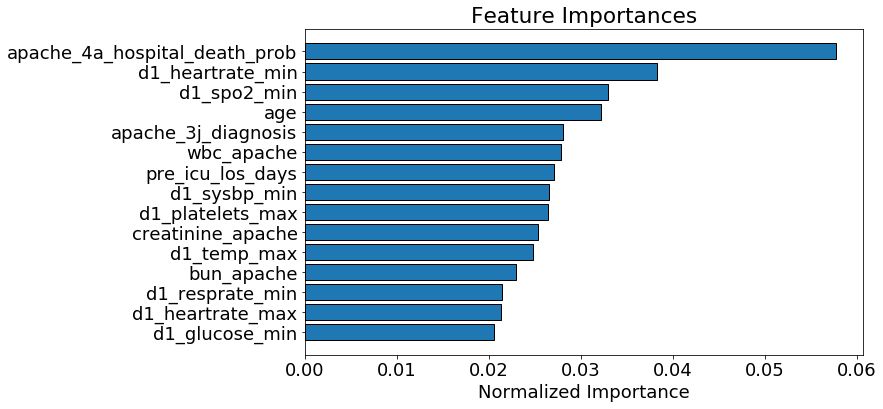

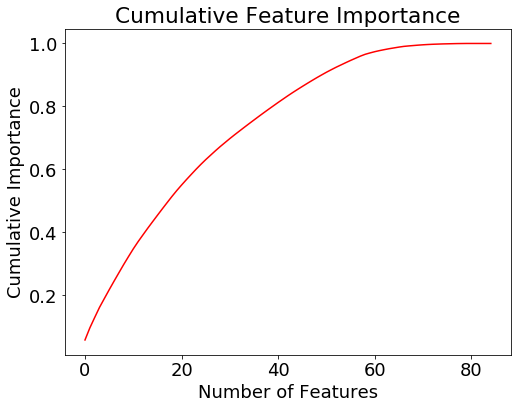

50 features required for 0.90 of cumulative importance


In [0]:
norm_feature_importances = plot_feature_importances(feature_importances)

## Prueba F de Fisher

In [0]:
# Aplicando el algoritmo univariante de prueba F.
k = 50  # número de atributos a seleccionar
entrenar = data.drop(['hospital_death'], axis=1)
columnas = list(entrenar.columns.values)
seleccionadas = SelectKBest(f_classif, k=k).fit(entrenar, y)

atrib = seleccionadas.get_support()
atributos = [columnas[i] for i in list(atrib.nonzero()[0])]

C:\Users\viole\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning:

Features [5] are constant.

C:\Users\viole\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning:

invalid value encountered in true_divide



## Eliminación Recursiva de atributos

In [0]:
modelo = ExtraTreesClassifier()
era = RFE(modelo, 52)  # número de atributos a seleccionar
era = era.fit(entrenar, y)

atrib = era.support_
atributos = [columnas[i] for i in list(atrib.nonzero()[0])]

-------

# Umbalanced

-------

# Classification

## LDA (Fisher)

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [0]:
kf = KFold(n_splits=5)
clf = LinearDiscriminantAnalysis(n_components=2)
clf.fit(x_train, y_train)
score = clf.score(x_train,y_train)

In [0]:
scores = cross_val_score(clf, x_train, y_train, cv=kf, scoring="roc_auc")
print("Metricas cross_validation", scores)
print("Media de cross_validation", scores.mean())

In [0]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Accuracy normalizando:",metrics.accuracy_score(y_test,y_pred))
print(cnf_matrix)

In [0]:
y_pred_proba = clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Mayoría de votos

In [0]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier ,VotingClassifier
# Random Forest Classifier
RFC = RandomForestClassifier(n_estimators=100)
# Gradient Boosting Classifier
GBC = GradientBoostingClassifier(random_state=1)
# Voting Classifier with soft voting 
votingC = VotingClassifier(estimators=[('rfc', RFC),('gbc',GBC)], voting='soft')
votingC = votingC.fit(x_train, y_train)
y_pred = votingC.predict(x_test)

In [0]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print(cnf_matrix)

In [0]:
y_pred_proba = votingC.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Boosted Trees

In [0]:
clf = GBC.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [0]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print(cnf_matrix)

In [0]:
y_pred_proba = clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Random Forest

In [0]:
clf = RFC.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [0]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Accuracy normalizando:",metrics.accuracy_score(y_test,y_pred))
print(cnf_matrix)

In [0]:
y_pred_proba = clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## SVM (support vector machine)

In [0]:
from sklearn import svm
svm_clf = svm.SVC(kernel='linear') # Linear Kernel

In [0]:
svm_clf.fit(x_train, y_train)

In [0]:
y_pred = svm_clf.predict(x_test)

In [0]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Accuracy normalizando:",metrics.accuracy_score(y_test,y_pred))
print(cnf_matrix)

In [0]:
y_pred_proba = clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()